<a href="https://colab.research.google.com/github/mohan9345684510/Data-science-and-Machine-Learning-Project/blob/main/Restaurant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [ ]:
restaurant_data = pd.read_csv('/content/restaurant_data.csv')
restaurant_data

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,Suburban,Indian,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,5.0,Yes,37,0,434653.45
8364,Restaurant 8364,Rural,Indian,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,2.6,No,37,21,414977.92
8365,Restaurant 8365,Downtown,Italian,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,1.7,Yes,83,21,930395.87
8366,Restaurant 8366,Rural,American,3.1,31,44.53,707,7170,1,729,178.482851,6.1,2.1,No,6,21,311493.48


In [ ]:
restaurant_data.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [ ]:
restaurant_data.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [ ]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [ ]:
restaurant_data.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [ ]:
restaurant_data['Location'].value_counts()

Location
Downtown    2821
Suburban    2785
Rural       2762
Name: count, dtype: int64

In [ ]:
restaurant_data['Cuisine'].value_counts()

Cuisine
French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
columns = ['Location', 'Cuisine','Parking Availability']
encoded_data = encoder.fit_transform(restaurant_data[columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns))


In [ ]:
restaurant_data = restaurant_data.drop(columns=columns)
restaurant_data = pd.concat([restaurant_data, encoded_df], axis=1)


In [ ]:
restaurant_data

,Name,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,...,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,Restaurant 0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,Restaurant 1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,Restaurant 2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,Restaurant 3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Restaurant 4,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8363,Restaurant 8363,3.4,54,34.85,1102,11298,11,380,253.919515,9.5,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8364,Restaurant 8364,3.7,49,36.88,1988,20432,9,713,175.590195,2.7,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8365,Restaurant 8365,4.7,88,46.87,5949,63945,6,436,222.953647,4.8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8366,Restaurant 8366,3.1,31,44.53,707,7170,1,729,178.482851,6.1,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X = restaurant_data.drop(columns=['Name','Revenue'])
Y = restaurant_data['Revenue']

In [ ]:
X.head()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
0,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
Y.head()

0     638945.52
1     490207.83
2     541368.62
3     404556.80
4    1491046.35
Name: Revenue, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
X_train

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
28,4.7,32,53.33,2362,29777,8,561,206.054739,2.8,1.6,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2323,3.3,59,61.07,1434,16686,2,805,229.422943,3.8,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6670,4.6,43,45.09,1087,10476,15,554,67.414905,9.8,3.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
237,4.2,70,31.99,4035,40734,15,980,85.376597,7.9,2.3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4038,4.6,57,58.34,1493,16562,16,545,119.374328,7.3,5.1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,3.7,37,53.84,2917,33874,2,584,139.095599,4.8,5.5,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2514,4.7,66,34.51,3563,39122,17,493,62.389605,3.0,1.1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6637,3.9,32,50.86,1825,23339,8,716,197.441324,8.1,1.9,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2575,4.3,59,39.43,2712,30081,6,939,184.438962,4.6,7.1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,...,Location_Rural,Location_Suburban,Cuisine_American,Cuisine_French,Cuisine_Indian,Cuisine_Italian,Cuisine_Japanese,Cuisine_Mexican,Parking Availability_No,Parking Availability_Yes
3524,4.6,50,69.61,4148,50449,7,255,157.458084,5.4,2.5,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3193,4.6,90,28.09,6217,64384,8,766,290.950935,3.2,9.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1365,3.6,47,32.97,3097,32728,2,493,220.105925,4.6,8.6,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6673,3.0,30,40.74,989,8782,18,489,251.719153,6.3,6.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
742,4.9,33,50.20,4449,51032,5,527,158.336635,4.1,3.3,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072,3.5,50,37.85,1065,10629,6,431,70.933615,8.8,7.9,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1678,4.9,44,38.14,986,12195,5,829,296.457153,3.6,1.6,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
6621,3.6,77,40.57,6147,65730,19,871,278.512318,4.6,1.7,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5176,3.7,68,55.81,1311,11891,11,529,218.134904,2.3,6.3,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
Y_train

28      392170.36
2323    799924.31
6670    452090.05
237     523466.99
4038    759749.74
          ...    
1099    453290.88
2514    526316.69
6637    377255.47
2575    529287.67
7336    517755.85
Name: Revenue, Length: 6694, dtype: float64

In [ ]:
Y_test

[786262.5,
 584530.61,
 356744.73,
 295527.2,
 382778.5,
 1045747.52,
 564264.7,
 454736.8,
 421361.25,
 449045.6,
 613017.7,
 370281.72,
 619639.1,
 320346.45,
 1027173.91,
 1096918.99,
 707049.7,
 391228.59,
 400651.55,
 560993.76,
 576846.45,
 802890.65,
 470695.08,
 436362.63,
 718391.92,
 357303.22,
 868987.45,
 519293.75,
 506611.85,
 248695.47,
 748859.11,
 589998.85,
 828518.6,
 451015.37,
 556946.63,
 448844.35,
 550343.14,
 380651.67,
 495283.0,
 1389675.75,
 782321.98,
 350232.84,
 454610.14,
 484571.96,
 736353.15,
 310277.42,
 1205289.45,
 1426078.15,
 439526.62,
 1387039.21,
 304161.79,
 925995.0,
 617291.96,
 891055.78,
 333410.65,
 968924.58,
 547938.97,
 304469.05,
 442674.54,
 360783.99,
 775848.4,
 909097.04,
 446785.94,
 745282.5,
 457351.25,
 734555.99,
 499302.01,
 718175.19,
 434801.22,
 1455734.66,
 339184.57,
 852565.05,
 561196.84,
 254981.05,
 1092436.4,
 927249.51,
 281727.81,
 504199.17,
 414296.17,
 481443.65,
 621663.38,
 469945.21,
 403237.07,
 567154.09

In [ ]:
svr_model = SVR(kernel='linear')
svr_model.fit(X_train,Y_train)

SVR(kernel='linear')

Evaluation

In [ ]:
test_data_prediction = svr_model.predict(X_test)
print(test_data_prediction)

[821205.69395525 706407.48883398 340304.55640717 ... 743465.2757066
 813224.33052517 791701.84476097]


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
# R2 Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9517964654799029


In [ ]:
Y_test = list(Y_test)

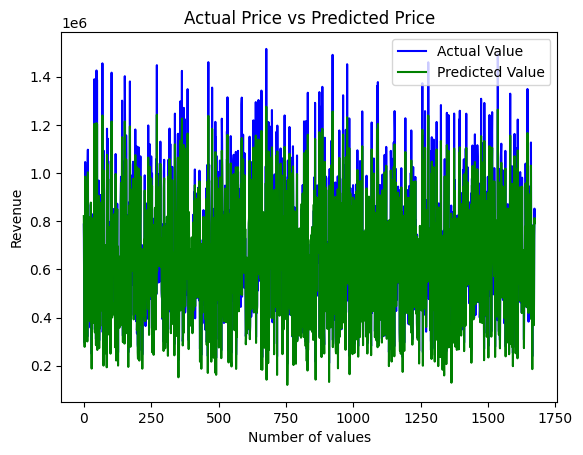

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Revenue')
plt.legend()
plt.show()

In [ ]:
# Building a prediction System

input_data =(4.6,	90,	28.09,	6217,	64384,	8	,766,	290.9509353277657	,3.2,	9.4,	88,	1,	1.0,	0.0,	0.0,	0.0,	0.0,	0.0,	0.0,	0.0 ,0.1 ,0.1 ,0.1)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = svr_model.predict(input_data_reshaped)
print(prediction)

[706586.58572955]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
